## Model_NowTV
## Table of Contents:
* [0. Importing dependencies](#dependencies)
* [1. Setting up of the dataset](#1.0)
    * [1.1 Importing of the dataset](#1.1)
    * [1.2 Splitting of the dataset](#1.2)
* [2. Model Implementation](#2.0)
    * [2.1 Model training](#2.1)


# 0. Importing dependencies  <a class="anchor" id="dependencies"></a>

In [2]:
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import joblib
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# 1. Setting up of the dataset <a class="anchor" id="1.0"></a>

## 1.1 Importing of the dataset <a class="anchor" id="1.1"></a>

In [3]:
# Load the final dataframe
file_path = '/content/gdrive/My Drive/df_final.csv'
df_final = pd.read_csv(file_path)

print(df_final.columns)

Index(['trend_vc', 'yearly_vc', 'weekly_vc', 'trend_i', 'yearly_i', 'weekly_i',
       'trend_ud', 'yearly_ud', 'weekly_ud', 'videoConsumption', 'impression'],
      dtype='object')


## 1.2 Splitting the dataset <a class="anchor" id="1.2"></a>

In [4]:
# Define input features and target outputs
prophet_features = ['weekly_vc', 'weekly_i', 'weekly_ud']
# original_features = ['videoConsumption', 'impression']
targets = ['videoConsumption', 'impression']

all_features = prophet_features + targets  # Include both Prophet features and original data


In [5]:
# Split dataset function
def split_dataset(df):
    idx_train_end = round(0.7 * len(df))
    idx_val_end = round(0.85 * len(df))
    return df.iloc[:idx_train_end], df.iloc[idx_train_end:idx_val_end], df.iloc[idx_val_end:]

df_train, df_val, df_test = split_dataset(df_final)

# 2. Model Implementation <a class="anchor" id="2.0"></a>

## 2.1 Model training <a class="anchor" id="2.1"></a>

In [6]:
def rolling_window_forecast(data, window_size, forecast_horizon, model):
    predictions_vc, predictions_i = [], []
    true_values_vc, true_values_i = [], []

    for start in range(0, len(data) - window_size - forecast_horizon, forecast_horizon):
        end = start + window_size
        X_train = data[start:end]
        y_train_vc = data[start:end, -2]
        y_train_i = data[start:end, -1]

        X_test = data[end:end + forecast_horizon]
        y_test_vc = data[end:end + forecast_horizon, -2]
        y_test_i = data[end:end + forecast_horizon, -1]

        y_train = np.vstack((y_train_vc, y_train_i)).T
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        predictions_vc.extend(y_pred[:, 0])
        predictions_i.extend(y_pred[:, 1])
        true_values_vc.extend(y_test_vc)
        true_values_i.extend(y_test_i)

    return predictions_vc, predictions_i, true_values_vc, true_values_i


In [7]:
def plot_predictions(true_values, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')
    plt.plot(predictions, label='Predictions', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [8]:
# Window sizes for rolling window
window_sizes = {
    '1 day': 1440,
    '4 days': 1440 * 4,
    '1 week': 1440 * 7,
}
forecast_horizon = 1440
results = {}
errors = {}
min_rmse = float('inf')
best_window_size = None
best_model = None

流式输出内容被截断，只能显示最后 5000 行内容。
[LightGBM] [Info] Start training from score 46572.559722
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 5
[LightGBM] [Info] Start training from score 2816.172917
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 5
[LightGBM] [Info] Start training from score 76367.964583
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data 

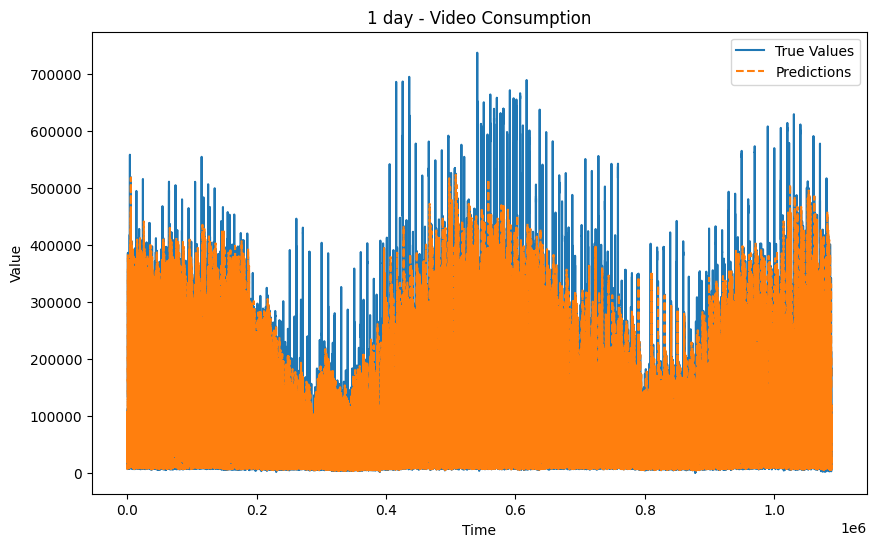

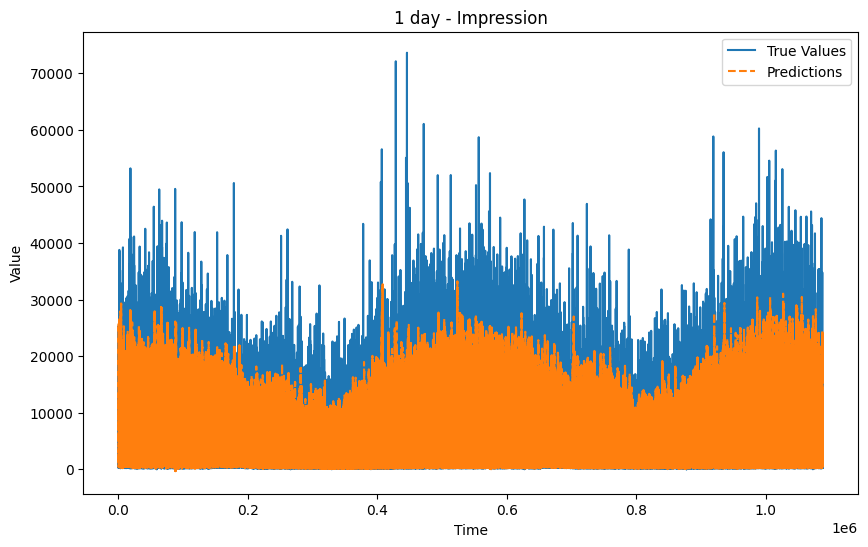

流式输出内容被截断，只能显示最后 5000 行内容。
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 5760, number of used features: 5
[LightGBM] [Info] Start training from score 55300.251042
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 5760, number of used features: 5
[LightGBM] [Info] Start training from score 3048.193229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 5760, number of used features: 5

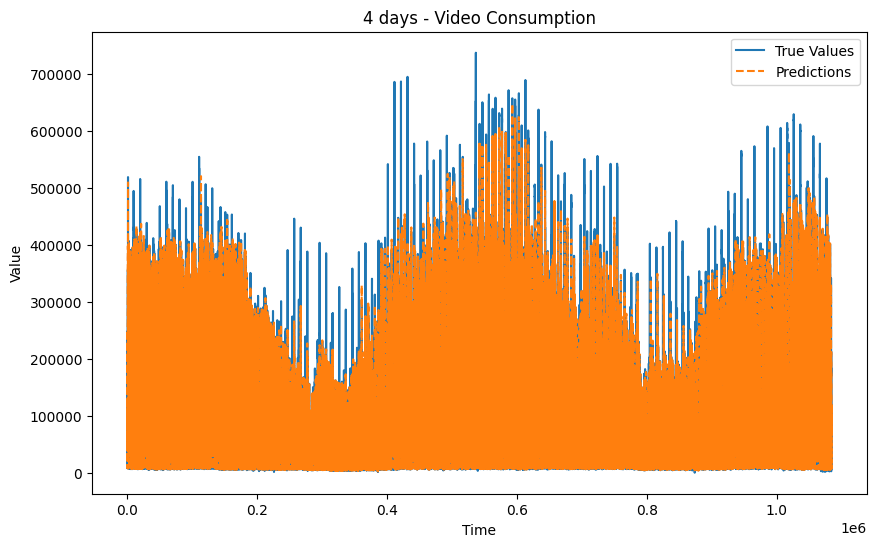

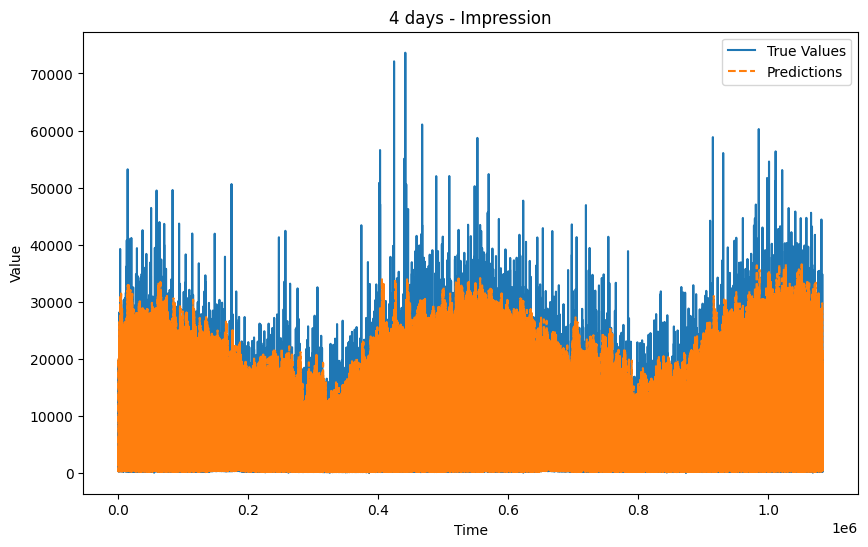

流式输出内容被截断，只能显示最后 5000 行内容。
[LightGBM] [Info] Number of data points in the train set: 10080, number of used features: 5
[LightGBM] [Info] Start training from score 58686.112599
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 10080, number of used features: 5
[LightGBM] [Info] Start training from score 3098.629167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 10080, number of used features: 5
[LightGBM] [Info] Start training from score 58663.718750
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=tru

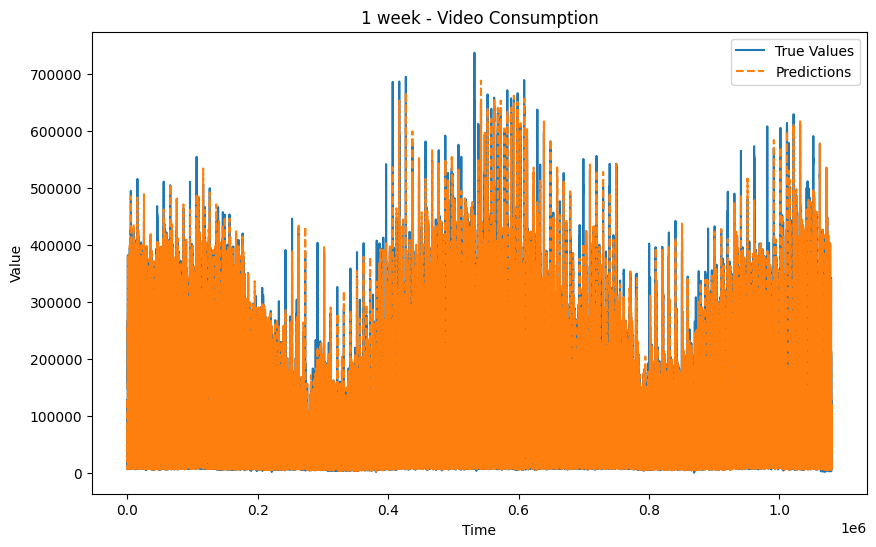

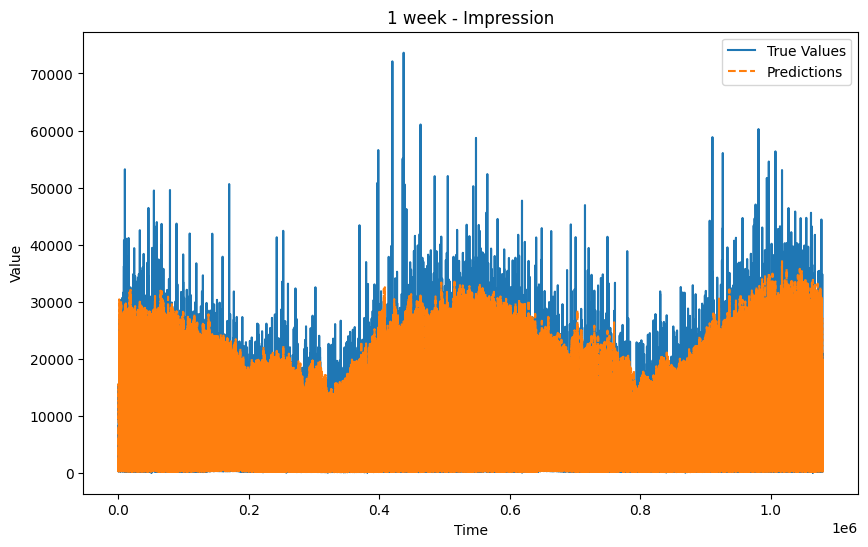

In [9]:
# Evaluate model for each window size
train_data = df_train[all_features].dropna().values

for window_name, window_size in window_sizes.items():
    model =  LGBMRegressor(random_state=42)
    mor = MultiOutputRegressor(model)

    predictions_vc, predictions_i, true_values_vc, true_values_i = rolling_window_forecast(train_data, window_size, forecast_horizon, mor)

    mse_vc = mean_squared_error(true_values_vc, predictions_vc)
    rmse_vc = sqrt(mse_vc)
    mse_i = mean_squared_error(true_values_i, predictions_i)
    rmse_i = sqrt(mse_i)

    if rmse_vc + rmse_i < min_rmse:
        min_rmse = rmse_vc + rmse_i
        best_window_size = window_size
        best_model = mor

    errors[window_name] = {
        'MSE_vc': mse_vc,
        'RMSE_vc': rmse_vc,
        'MSE_i': mse_i,
        'RMSE_i': rmse_i
    }

    print(f"Window: {window_name}")
    print(f"  Video Consumption - MSE: {mse_vc:.3f}, RMSE: {rmse_vc:.3f}")
    print(f"  Impression - MSE: {mse_i:.3f}, RMSE: {rmse_i:.3f}")

    plot_predictions(true_values_vc, predictions_vc, f'{window_name} - Video Consumption')
    plot_predictions(true_values_i, predictions_i, f'{window_name} - Impression')

In [12]:
# Save the best model
model_filename = '/content/gdrive/My Drive/LGBM_rw_add_best_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to /content/gdrive/My Drive/LGBM_rw_add_best_model.pkl


In [17]:
# Print best window size
print("\nBest Window Size:")
print(best_window_size)


Best Window Size:
10080


In [15]:
print("\nBest Model Parameters:")
print(best_model.estimators_[0].get_params())


Best Model Parameters:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [16]:
print("\nBest Model Features Importance:")
print(best_model.estimators_[0].feature_importances_)


Best Model Features Importance:
[ 329  191  203 1619  658]
